# Week 8-1 영어 리뷰 데이터 전처리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('D:\kjw\lecture\LG전자_21\week8_텍스트마이닝')
review_df=pd.read_csv("thinq_e_review.csv")
review_df

,date,star,like,comment
0,"September 18, 2021",1,12.0,This app no longer works. It has just updated ...
1,"September 19, 2021",1,NaN,Everything worked fine until a week or so ago....
2,"September 18, 2021",2,6.0,App doesn't work with wired TV connection. EDI...
3,"September 18, 2021",1,2.0,I'm trying this again by have Alexa connection...
4,"September 1, 2021",1,104.0,"Just embarrassing. Absolutely, 100%, will not ..."
...,...,...,...,...
11275,"June 6, 2019",5,NaN,Good app. useful so far
11276,"November 9, 2020",5,NaN,Its been helpful. Hope it stays that way
11277,"July 17, 2020",5,NaN,Worked like it should and gave me feedback tha...
11278,"September 27, 2020",1,NaN,error routed device.. .


In [10]:
# 대소문자 처리
review_df['comment_n']=review_df['comment'].apply(lambda x: x.lower())
review_df['comment_n']

0        this app no longer works. it has just updated ...
1        everything worked fine until a week or so ago....
2        app doesn't work with wired tv connection. edi...
3        i'm trying this again by have alexa connection...
4        just embarrassing. absolutely, 100%, will not ...
                               ...                        
11275                              good app. useful so far
11276             its been helpful. hope it stays that way
11277    worked like it should and gave me feedback tha...
11278                              error routed device.. .
11279                 not connected with washing machine 😞
Name: comment_n, Length: 11280, dtype: object

In [11]:
# 숫자, 문장부호, 특수문자 제거
import re
p=re.compile("[0-9]+")
review_df['comment_n']=review_df['comment_n'].apply(lambda x: p.sub(" ", x))
review_df['comment_n']

0        this app no longer works. it has just updated ...
1        everything worked fine until a week or so ago....
2        app doesn't work with wired tv connection. edi...
3        i'm trying this again by have alexa connection...
4        just embarrassing. absolutely,  %, will not co...
                               ...                        
11275                              good app. useful so far
11276             its been helpful. hope it stays that way
11277    worked like it should and gave me feedback tha...
11278                              error routed device.. .
11279                 not connected with washing machine 😞
Name: comment_n, Length: 11280, dtype: object

In [12]:
p=re.compile("\W+")
review_df['comment_n']=review_df['comment_n'].apply(lambda x: p.sub(" ", x))
review_df['comment_n']

0        this app no longer works it has just updated a...
1        everything worked fine until a week or so ago ...
2        app doesn t work with wired tv connection edit...
3        i m trying this again by have alexa connection...
4        just embarrassing absolutely will not connect ...
                               ...                        
11275                               good app useful so far
11276              its been helpful hope it stays that way
11277    worked like it should and gave me feedback tha...
11278                                 error routed device 
11279                  not connected with washing machine 
Name: comment_n, Length: 11280, dtype: object

In [13]:
# 토콘화
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords  

stop_words = set(stopwords.words('english')) 

review_df['comment_n']=review_df['comment_n'].apply(lambda x: word_tokenize(x))
review_df['comment_n']

0        [this, app, no, longer, works, it, has, just, ...
1        [everything, worked, fine, until, a, week, or,...
2        [app, doesn, t, work, with, wired, tv, connect...
3        [i, m, trying, this, again, by, have, alexa, c...
4        [just, embarrassing, absolutely, will, not, co...
                               ...                        
11275                         [good, app, useful, so, far]
11276     [its, been, helpful, hope, it, stays, that, way]
11277    [worked, like, it, should, and, gave, me, feed...
11278                              [error, routed, device]
11279             [not, connected, with, washing, machine]
Name: comment_n, Length: 11280, dtype: object

In [14]:
# 불용어 처리
def remove_stopwords(word_tokens):
    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    return result

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_stopwords(x))
review_df['comment_n']

0        [app, longer, works, updated, tells, login, in...
1        [everything, worked, fine, week, ago, connect,...
2        [app, work, wired, tv, connection, edit, tried...
3        [trying, alexa, connection, turn, lg, tv, webo...
4        [embarrassing, absolutely, connect, google, ho...
                               ...                        
11275                             [good, app, useful, far]
11276                          [helpful, hope, stays, way]
11277              [worked, like, gave, feedback, wanting]
11278                              [error, routed, device]
11279                        [connected, washing, machine]
Name: comment_n, Length: 11280, dtype: object

In [15]:
# 어간 추출
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()

review_df['comment_n']=review_df['comment_n'].apply(lambda x: [n.lemmatize(w) for w in x])

review_df.to_csv('thinq_e_review_result.csv',index=False)
review_df['comment_n']

0        [app, longer, work, updated, tell, login, inco...
1        [everything, worked, fine, week, ago, connect,...
2        [app, work, wired, tv, connection, edit, tried...
3        [trying, alexa, connection, turn, lg, tv, webo...
4        [embarrassing, absolutely, connect, google, ho...
                               ...                        
11275                             [good, app, useful, far]
11276                           [helpful, hope, stay, way]
11277              [worked, like, gave, feedback, wanting]
11278                              [error, routed, device]
11279                        [connected, washing, machine]
Name: comment_n, Length: 11280, dtype: object

<AxesSubplot:>

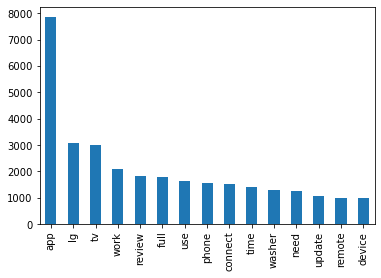

In [16]:
# 단어 빈도 그래프
total_word=[]
for i in range(len(review_df)):
    total_word.extend(review_df.loc[i,'comment_n'])

pd.Series(total_word).value_counts().head(15)

pd.Series(total_word).value_counts().head(15).plot(kind='bar')

<AxesSubplot:>

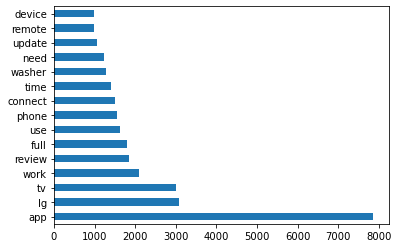

In [17]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh')

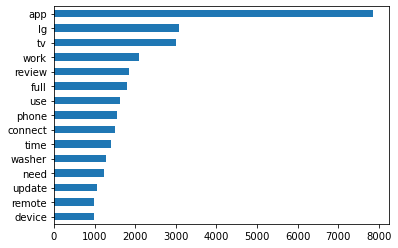

In [18]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh').invert_yaxis()